In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('marketing_campaign_data.csv')
df

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2235,10870,1967,S1,Menikah,61223000.0,0,1,13-06-2013,46,709000,43000,182000,42000,118000,247000,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,2236,4001,1946,S3,Bertunangan,64014000.0,2,1,10-06-2014,56,406000,0,30000,0,0,8000,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,2237,7270,1981,S1,Cerai,56981000.0,0,0,25-01-2014,91,908000,48000,217000,32000,12000,24000,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,2238,8235,1956,S2,Bertunangan,69245000.0,0,1,24-01-2014,8,428000,30000,214000,80000,30000,61000,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

## Feature Engineering

In [4]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [5]:
df['age'] = 2022 - df['Year_Birth']
df['joint_at_age'] = df['Dt_Customer'].dt.year - df['Year_Birth']
df['total_kid'] = df['Kidhome'] + df['Teenhome']
df['is_parent'] = np.where(df['total_kid'] > 0,1,0)

In [6]:
df.head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,joint_at_age,total_kid,is_parent
0,0,5524,1957,S1,Lajang,58138000.0,0,0,2012-04-09,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1,65,55,0,0
1,1,2174,1954,S1,Lajang,46344000.0,1,1,2014-08-03,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0,68,60,2,1
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,2013-08-21,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0,57,48,0,0
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,2014-10-02,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0,38,30,1,1
4,4,5324,1981,S3,Menikah,58293000.0,1,0,2014-01-19,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0,41,33,1,1


In [7]:
## Amount spent
df['total_spent'] = df['MntCoke'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

## Total accept campaign
df['total_accept_campaign'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']

## Total transaction
df['total_transaction'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

In [8]:
#age group
df.loc[(df['age'] >= 0) & (df['age'] < 26), 'age_group'] = 'gen_z'
df.loc[(df['age'] >= 26) & (df['age'] < 42), 'age_group'] = 'millenials'
df.loc[(df['age'] >= 42) & (df['age'] < 58), 'age_group'] = 'gen_x'
df.loc[(df['age'] >= 58), 'age_group'] = 'boomers'

In [9]:
df['NumWebVisitsMonth'].unique()

array([ 7,  5,  4,  6,  8,  9, 20,  2,  3,  1, 10,  0, 14, 19, 17, 13],
      dtype=int64)

In [10]:
# conversion rate
def safe_div(x,y):
    if y == 0:
        return 0
    return x / y
df['conversion_rate'] = df.apply(lambda x: safe_div(x['total_transaction'],x['NumWebVisitsMonth']), axis = 1)

In [11]:
df.head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,joint_at_age,total_kid,is_parent,total_spent,total_accept_campaign,total_transaction,age_group,conversion_rate
0,0,5524,1957,S1,Lajang,58138000.0,0,0,2012-04-09,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1,65,55,0,0,1617000,0,25,boomers,3.571429
1,1,2174,1954,S1,Lajang,46344000.0,1,1,2014-08-03,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0,68,60,2,1,27000,0,6,boomers,1.200000
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,2013-08-21,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0,57,48,0,0,776000,0,21,gen_x,5.250000
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,2014-10-02,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0,38,30,1,1,53000,0,8,millenials,1.333333
4,4,5324,1981,S3,Menikah,58293000.0,1,0,2014-01-19,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0,41,33,1,1,422000,0,19,millenials,3.800000


In [12]:
df.describe()

,Unnamed: 0,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,joint_at_age,total_kid,is_parent,total_spent,total_accept_campaign,total_transaction,conversion_rate
count,2240.000000,2240.000000,2240.000000,2.216000e+03,2240.000000,2240.000000,2240.000000,2.240000e+03,2240.000000,2.240000e+03,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2.240000e+03,2240.000000,2240.000000,2240.000000
mean,1119.500000,5592.159821,1968.805804,5.224725e+07,0.444196,0.506250,49.109375,3.039357e+05,26302.232143,1.669500e+05,37525.446429,27062.946429,44021.875000,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107,53.194196,44.222321,0.950446,0.715179,6.057982e+05,0.297768,14.862054,4.395222
std,646.776623,3246.662198,11.984069,2.517308e+07,0.538398,0.544538,28.962453,3.365974e+05,39773.433765,2.257154e+05,54628.979403,41280.498488,52167.438915,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274,11.984069,12.022855,0.751803,0.451430,6.022493e+05,0.678381,7.677173,4.913624
min,0.000000,0.000000,1893.000000,1.730000e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,26.000000,16.000000,0.000000,0.000000,5.000000e+03,0.000000,0.000000,0.000000
25%,559.750000,2828.250000,1959.000000,3.530300e+07,0.000000,0.000000,24.000000,2.375000e+04,1000.000000,1.600000e+04,3000.000000,1000.000000,9000.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,45.000000,36.000000,0.000000,0.000000,6.875000e+04,0.000000,8.000000,1.222222
50%,1119.500000,5458.500000,1970.000000,5.138150e+07,0.000000,0.000000,49.000000,1.735000e+05,8000.000000,6.700000e+04,12000.000000,8000.000000,24000.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,52.000000,43.000000,1.000000,1.000000,3.960000e+05,0.000000,15.000000,2.600000
75%,1679.250000,8427.750000,1977.000000,6.852200e+07,1.000000,1.000000,74.000000,5.042500e+05,33000.000000,2.320000e+05,50000.000000,33000.000000,56000.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,63.000000,54.000000,1.000000,1.000000,1.045500e+06,0.000000,21.000000,5.350000
max,2239.000000,11191.000000,1996.000000,6.666660e+08,2.000000,2.000000,99.000000,1.493000e+06,199000.000000,1.725000e+06,259000.000000,263000.000000,362000.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,129.000000,121.000000,3.000000,1.000000,2.525000e+06,4.000000,44.000000,43.000000


<AxesSubplot:>

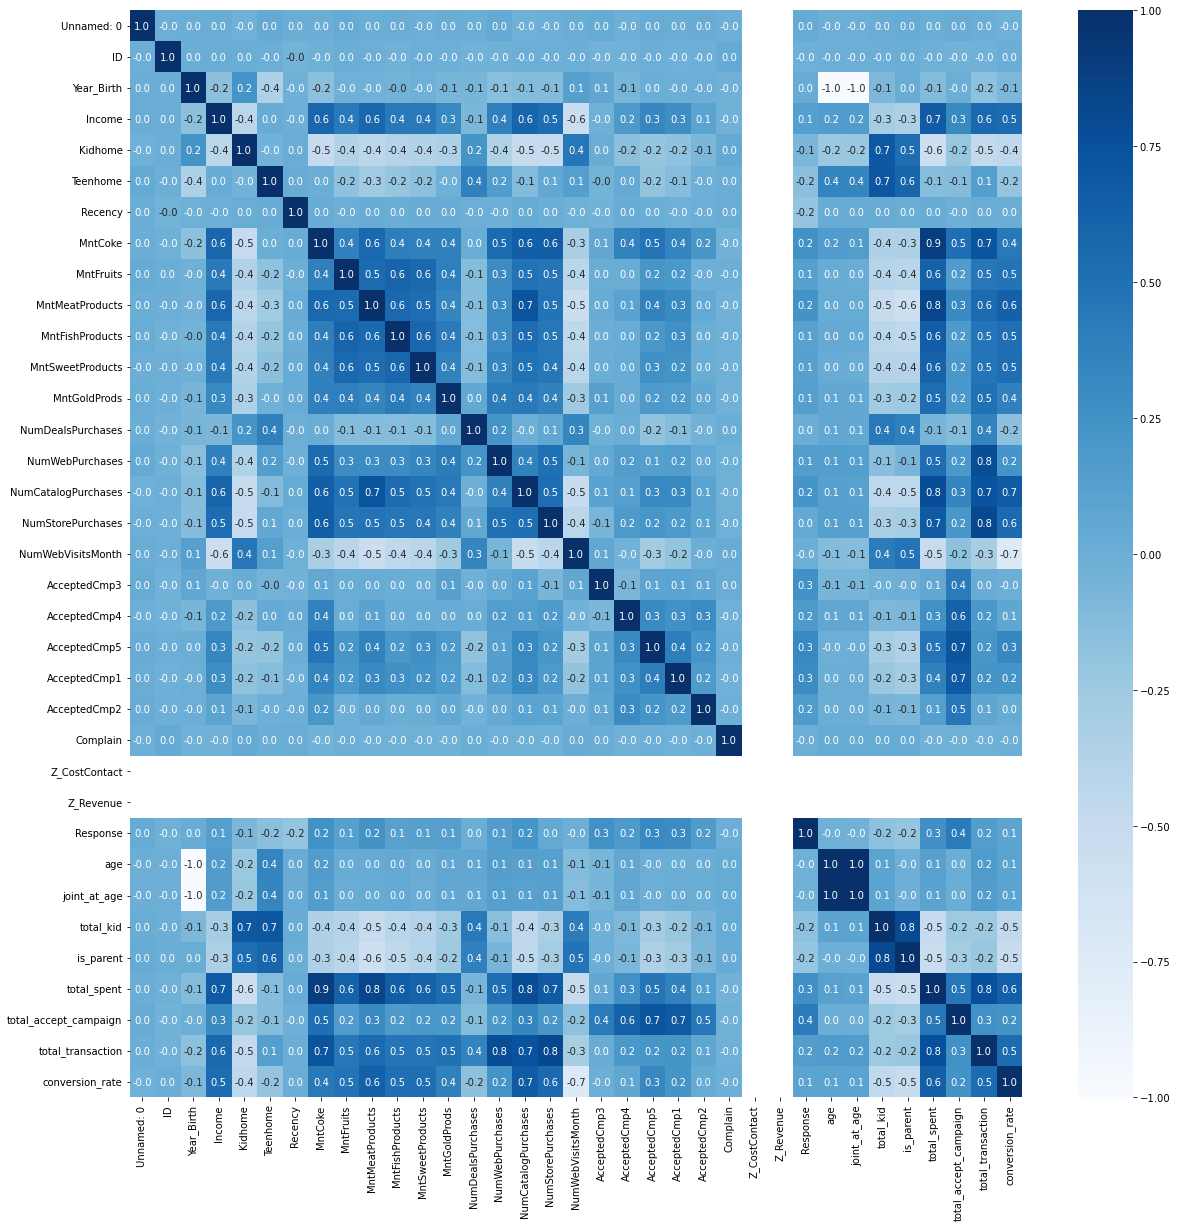

In [13]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.1f')

## Age vs Conversion Rate

<function matplotlib.pyplot.show(close=None, block=None)>

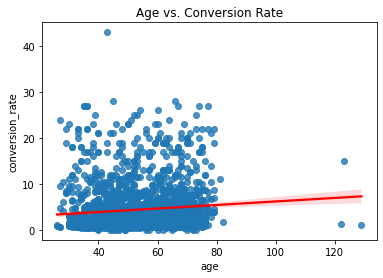

In [14]:
sns.regplot(x = df['age'], y = df['conversion_rate'],line_kws = {'color':'red'})
plt.title('Age vs. Conversion Rate')
plt.show
#plt.savefig('Age vs Conversion Rate.png')

<function matplotlib.pyplot.show(close=None, block=None)>

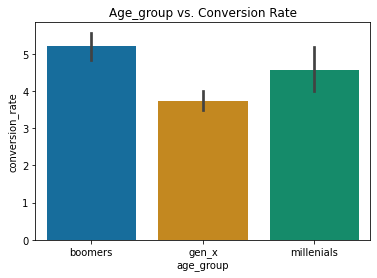

In [15]:
sns.barplot(x = df['age_group'], y = df['conversion_rate'],palette = 'colorblind')
plt.title('Age_group vs. Conversion Rate')
plt.show
#plt.savefig('Age_group vs Conversion Rate.png')

## Spending vs. Conversion Rate

<function matplotlib.pyplot.show(close=None, block=None)>

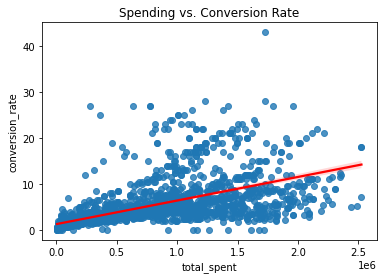

In [16]:
sns.regplot(x = df['total_spent'], y = df['conversion_rate'],line_kws = {'color':'red'})
plt.title('Spending vs. Conversion Rate')
plt.show
#plt.savefig('Spending vs Conversion Rate.png')

## Visit vs. Conversion Rate

<function matplotlib.pyplot.show(close=None, block=None)>

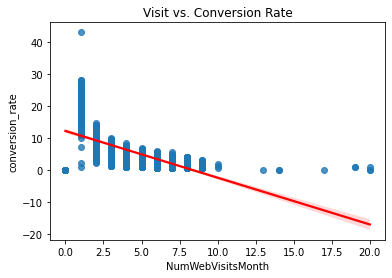

In [17]:
visit_vs_conversion = sns.regplot(x = df['NumWebVisitsMonth'], y = df['conversion_rate'],line_kws = {'color':'red'})
plt.title('Visit vs. Conversion Rate')
plt.show
#plt.savefig('Visit vs Conversion Rate.png')

## Transaction vs. Conversion Rate

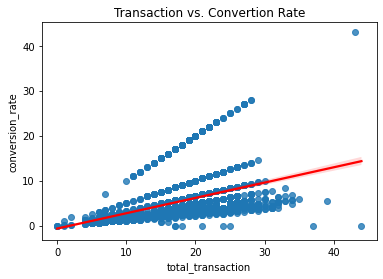

In [18]:
sns.regplot(x = df['total_transaction'], y = df['conversion_rate'],line_kws = {'color':'red'})
plt.title('Transaction vs. Convertion Rate')
plt.show()
#plt.savefig('Transaction vs Conversion Rate.png')

## Visit vs. Transaction

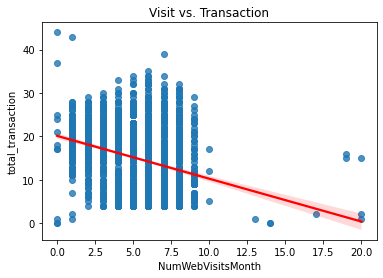

In [19]:
sns.regplot(x = df['NumWebVisitsMonth'], y = df['total_transaction'],line_kws = {'color':'red'})
plt.title('Visit vs. Transaction')
plt.show()
#plt.savefig('Visit vs Transaction.png')

## Campaign vs. Conversion Rate

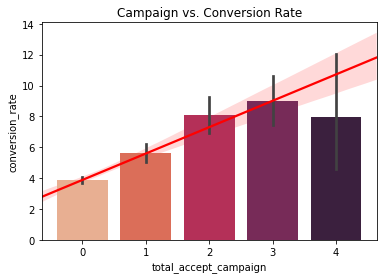

In [20]:
sns.barplot(x = df['total_accept_campaign'], y = df['conversion_rate'],palette='rocket_r')
sns.regplot(x=df['total_accept_campaign'],y = df['conversion_rate'],line_kws ={'color':'red'},
            data=df, scatter=False, truncate=False)
plt.title('Campaign vs. Conversion Rate')
plt.show()
#plt.savefig('Campaign vs Conversion Rate.png')

## Income vs. Conversion Rate

(0.0, 120000000.0)

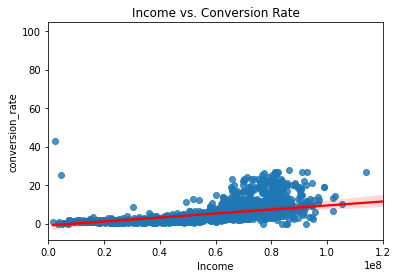

In [21]:
plot = sns.regplot(x = df['Income'], y = df['conversion_rate'],line_kws = {'color':'red'})
plt.title('Income vs. Conversion Rate')
plot.set_xlim(0, 120000000)
#plt.savefig('Income vs Conversion Rate.png')

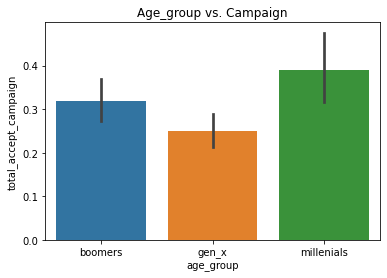

In [22]:
sns.barplot(x = df['age_group'], y = df['total_accept_campaign'])
plt.title('Age_group vs. Campaign')
plt.show()

## Data Cleansing

df.isna().sum().sort_values(ascending = False)

df.loc[df.Income.isnull()]

df_clean = df.copy()

# Drop Missing Value from Income Column
df_clean = df_clean.dropna(subset=['Income'])
df_clean.isna().sum()

# Check Duplicate data
df_clean.duplicated().sum()

## Drop unnecessary Column

## Exploratory Data Analysis

### Statistical Summary

cat = df.select_dtypes(include = 'object')
numerical = df.select_dtypes(exclude = 'object')

cat_cols = cat.columns.to_list()
print('Data category: ',cat_cols)

numerical_cols = numerical.columns.to_list()
print('Data numerik: ',numerical_cols)

df[numerical_cols].describe()

df[cat_cols].describe()

for col in cat:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()